### AUTHOR: Pramit Ray

#### Stock Market Prediction Using Numerical and Textual Analysis

In [1]:
#importing libraries 
import warnings
warnings.filterwarnings('ignore')
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h5>Loading and Reading the Datasets</h5>

In [2]:
# reading the datasets into pandas

df_stockprice = pd.read_csv('Input/BSESN.csv')
df_headlines = pd.read_csv('C:/Users/prami/OneDrive/Desktop/india-news-headlines.csv')

In [3]:
# displaying stock price dataset

df_stockprice.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2020-01-31,41146.558594,41154.488281,40671.011719,40723.488281,40723.488281,11500.0
1,1,2020-02-03,39701.019531,40014.898438,39563.070313,39872.308594,39872.308594,10600.0
2,2,2020-02-04,40178.738281,40818.941406,40117.460938,40789.378906,40789.378906,15300.0
3,3,2020-02-05,40921.710938,41177.000000,40703.320313,41142.660156,41142.660156,13900.0
4,4,2020-02-06,41209.128906,41405.429688,41113.109375,41306.031250,41306.031250,15000.0


In [4]:
# displaying stock news headlines dataset

df_headlines.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


<h5>Basic Data Analysis</h5>

In [5]:
# Checking datatypes in the dataset
print(df_stockprice.info())
print(df_headlines.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  497 non-null    int64  
 1   Date        497 non-null    object 
 2   Open        495 non-null    float64
 3   High        495 non-null    float64
 4   Low         495 non-null    float64
 5   Close       495 non-null    float64
 6   Adj Close   495 non-null    float64
 7   Volume      495 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 31.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 83.6+ MB
None


In [6]:
# Checking for null values in the data
print(df_stockprice.isnull().sum())
print(df_headlines.isnull().sum())

Unnamed: 0    0
Date          0
Open          2
High          2
Low           2
Close         2
Adj Close     2
Volume        2
dtype: int64
publish_date         0
headline_category    0
headline_text        0
dtype: int64


In [7]:
# Shapes of dataset
print('Stock Data: ',df_stockprice.shape,' News Data: ',df_headlines.shape)

Stock Data:  (497, 8)  News Data:  (3650970, 3)


<h5>Data Mining of the Datasets</h5>

In [8]:
# dropping duplicates
stock_price = df_stockprice.drop_duplicates()
# coverting the datatype of column 'Date' from type object to type 'datetime'
stock_price['Date'] = pd.to_datetime(stock_price['Date']).dt.normalize()
# filtering the important columns required
stock_price = stock_price.filter(['Date', 'Close', 'Open', 'High', 'Low', 'Volume'])
# setting column 'Date' as the index column
stock_price.set_index('Date', inplace= True)
# sorting the data according to the index i.e 'Date'
stock_price = stock_price.sort_index(ascending=True, axis=0)
stock_price

,Close,Open,High,Low,Volume
Date,,,,,
2020-01-31,40723.488281,41146.558594,41154.488281,40671.011719,11500.0
2020-02-03,39872.308594,39701.019531,40014.898438,39563.070313,10600.0
2020-02-04,40789.378906,40178.738281,40818.941406,40117.460938,15300.0
2020-02-05,41142.660156,40921.710938,41177.000000,40703.320313,13900.0
2020-02-06,41306.031250,41209.128906,41405.429688,41113.109375,15000.0
...,...,...,...,...,...
2022-01-24,57491.511719,59023.968750,59023.968750,56984.011719,10800.0
2022-01-25,57858.148438,57158.628906,57966.929688,56409.628906,10400.0
2022-01-27,57276.941406,57317.378906,57508.609375,56439.359375,10300.0


In [9]:
# dropping duplicates
stock_headlines = df_headlines.drop_duplicates()

# coverting the datatype of column 'Date' from type string to type 'datetime'
stock_headlines['publish_date'] = stock_headlines['publish_date'].astype(str)
stock_headlines['publish_date'] = stock_headlines['publish_date'].apply(lambda x: x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stock_headlines['publish_date'] = pd.to_datetime(stock_headlines['publish_date']).dt.normalize()

# filtering the important columns required
stock_headlines = stock_headlines.filter(['publish_date', 'headline_text'])

# grouping the news headlines according to 'Date'
stock_headlines = stock_headlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

# setting column 'Date' as the index column
stock_headlines.set_index('publish_date', inplace= True)

# sorting the data according to the index i.e 'Date'
stock_headlines = stock_headlines.sort_index(ascending=True, axis=0)
stock_headlines

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
...,...
2022-03-27,Playing a dead man in Body God meant sitting i...
2022-03-28,As fashion becomes democratic; demand for styl...
2022-03-29,Bobby Deol: Like my dad; I hope to be working ...


In [10]:
# concatenating the datasets stock_price and stock_headlines
stock_data = pd.concat([stock_price, stock_headlines], axis=1)
# dropping the null values if any
stock_data.dropna(axis=0, inplace=True)
# displaying the combined stock_data
stock_data

,Close,Open,High,Low,Volume,headline_text
2020-01-31,40723.488281,41146.558594,41154.488281,40671.011719,11500.0,bareilly youth demonstrates acts of bravery an...
2020-02-03,39872.308594,39701.019531,40014.898438,39563.070313,10600.0,Fan holds up banner asking if season 13 of the...
2020-02-04,40789.378906,40178.738281,40818.941406,40117.460938,15300.0,Students explored their fashion fundas at this...
2020-02-05,41142.660156,40921.710938,41177.000000,40703.320313,13900.0,Heritage preservation club at Tennur school fo...
2020-02-06,41306.031250,41209.128906,41405.429688,41113.109375,15000.0,Nashik traders seek rollback of onion export b...
...,...,...,...,...,...,...
2022-01-24,57491.511719,59023.968750,59023.968750,56984.011719,10800.0,'Toughest-to-please' segment has voted thrice ...
2022-01-25,57858.148438,57158.628906,57966.929688,56409.628906,10400.0,Shilpa Rao on Republic Day: We are a diverse n...
2022-01-27,57276.941406,57317.378906,57508.609375,56439.359375,10300.0,Horoscope Today; 27 January 2022: Check astrol...
2022-01-28,57200.230469,57795.109375,58084.328125,57119.281250,13000.0,Horoscope Today; 28 January 2022: Check astrol...


In [11]:
# adding empty sentiment columns to stock_data for later calculation
stock_data['compound'] = ''
stock_data['negative'] = ''
stock_data['neutral'] = ''
stock_data['positive'] = ''
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2020-01-31,40723.488281,41146.558594,41154.488281,40671.011719,11500.0,bareilly youth demonstrates acts of bravery an...,,,,
2020-02-03,39872.308594,39701.019531,40014.898438,39563.070313,10600.0,Fan holds up banner asking if season 13 of the...,,,,
2020-02-04,40789.378906,40178.738281,40818.941406,40117.460938,15300.0,Students explored their fashion fundas at this...,,,,
2020-02-05,41142.660156,40921.710938,41177.000000,40703.320313,13900.0,Heritage preservation club at Tennur school fo...,,,,
2020-02-06,41306.031250,41209.128906,41405.429688,41113.109375,15000.0,Nashik traders seek rollback of onion export b...,,,,


In [12]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\prami\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# importing requires libraries to analyze the sentiments
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
# instantiating the Sentiment Analyzer
sid = SentimentIntensityAnalyzer()
# calculating sentiment scores
stock_data['compound'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['compound'])
stock_data['negative'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neg'])
stock_data['neutral'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['neu'])
stock_data['positive'] = stock_data['headline_text'].apply(lambda x: sid.polarity_scores(x)['pos'])
# displaying the stock data
stock_data.head()

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2020-01-31,40723.488281,41146.558594,41154.488281,40671.011719,11500.0,bareilly youth demonstrates acts of bravery an...,-0.9999,0.134,0.803,0.062
2020-02-03,39872.308594,39701.019531,40014.898438,39563.070313,10600.0,Fan holds up banner asking if season 13 of the...,-0.9980,0.119,0.773,0.108
2020-02-04,40789.378906,40178.738281,40818.941406,40117.460938,15300.0,Students explored their fashion fundas at this...,-0.9999,0.171,0.745,0.084
2020-02-05,41142.660156,40921.710938,41177.000000,40703.320313,13900.0,Heritage preservation club at Tennur school fo...,-0.9999,0.150,0.773,0.076
2020-02-06,41306.031250,41209.128906,41405.429688,41113.109375,15000.0,Nashik traders seek rollback of onion export b...,-0.9999,0.156,0.762,0.082


In [14]:
# dropping the 'headline_text' which is unwanted now
stock_data.drop(['headline_text'], inplace=True, axis=1)
# rearranging the columns of the whole stock_data
stock_data = stock_data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]
# displaying the final stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2020-01-31,40723.488281,-0.9999,0.134,0.803,0.062,41146.558594,41154.488281,40671.011719,11500.0
2020-02-03,39872.308594,-0.9980,0.119,0.773,0.108,39701.019531,40014.898438,39563.070313,10600.0
2020-02-04,40789.378906,-0.9999,0.171,0.745,0.084,40178.738281,40818.941406,40117.460938,15300.0
2020-02-05,41142.660156,-0.9999,0.150,0.773,0.076,40921.710938,41177.000000,40703.320313,13900.0
2020-02-06,41306.031250,-0.9999,0.156,0.762,0.082,41209.128906,41405.429688,41113.109375,15000.0


In [15]:
# writing the prepared stock_data to disk
stock_data.to_csv('C:/Users/prami/OneDrive/Desktop/GRIP - The Sparks Foundation/Stock Market Prediction using Numerical and Textual Analysis/Input/stock_datafinal.csv')

In [16]:
# re-reading the stock_data into pandas dataframe
stock_data = pd.read_csv('Input/stock_datafinal.csv', index_col = False)
# renaming the column
stock_data.rename(columns={'Unnamed: 0':'Date'}, inplace = True)
# setting the column 'Date' as the index column
stock_data.set_index('Date', inplace=True)
# displaying the stock_data
stock_data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-01-31,40723.488281,-0.9999,0.134,0.803,0.062,41146.558594,41154.488281,40671.011719,11500.0
2020-02-03,39872.308594,-0.9980,0.119,0.773,0.108,39701.019531,40014.898438,39563.070313,10600.0
2020-02-04,40789.378906,-0.9999,0.171,0.745,0.084,40178.738281,40818.941406,40117.460938,15300.0
2020-02-05,41142.660156,-0.9999,0.150,0.773,0.076,40921.710938,41177.000000,40703.320313,13900.0
2020-02-06,41306.031250,-0.9999,0.156,0.762,0.082,41209.128906,41405.429688,41113.109375,15000.0


<h5>Basic Data Analysis of stock data</h5>

In [17]:
# displaying the shape i.e. number of rows and columns of stock_data
stock_data.shape

(495, 9)

In [18]:
# Showing information of datasets
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 2020-01-31 to 2022-01-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     495 non-null    float64
 1   compound  495 non-null    float64
 2   negative  495 non-null    float64
 3   neutral   495 non-null    float64
 4   positive  495 non-null    float64
 5   Open      495 non-null    float64
 6   High      495 non-null    float64
 7   Low       495 non-null    float64
 8   Volume    495 non-null    float64
dtypes: float64(9)
memory usage: 38.7+ KB


In [19]:
# Checking for null values
stock_data.isnull().sum()

Close       0
compound    0
negative    0
neutral     0
positive    0
Open        0
High        0
Low         0
Volume      0
dtype: int64

In [20]:
# displaying stock_data statistics
stock_data.describe()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,46582.621145,-0.983398,0.127291,0.796313,0.076392,46643.445865,46910.423453,46240.838735,16034.343434
std,9500.075095,0.178755,0.018326,0.023356,0.011723,9500.086113,9455.003548,9530.141575,13427.895323
min,25981.240234,-1.000000,0.076000,0.728000,0.044000,26499.810547,27462.869141,25638.900391,100.000000
25%,38413.355469,-0.999900,0.115000,0.781000,0.069000,38476.410157,38742.685547,38217.509765,9300.000000
50%,48600.609375,-0.999800,0.128000,0.794000,0.076000,48616.660156,48898.929688,48236.351563,14300.000000
75%,53491.105469,-0.999600,0.139000,0.811000,0.084000,53185.564454,53589.394532,53042.720704,19050.000000
max,61765.589844,0.999800,0.199000,0.877000,0.127000,62156.480469,62245.429688,61624.648438,188300.000000


Text(0, 0.5, 'Close Price ($)')

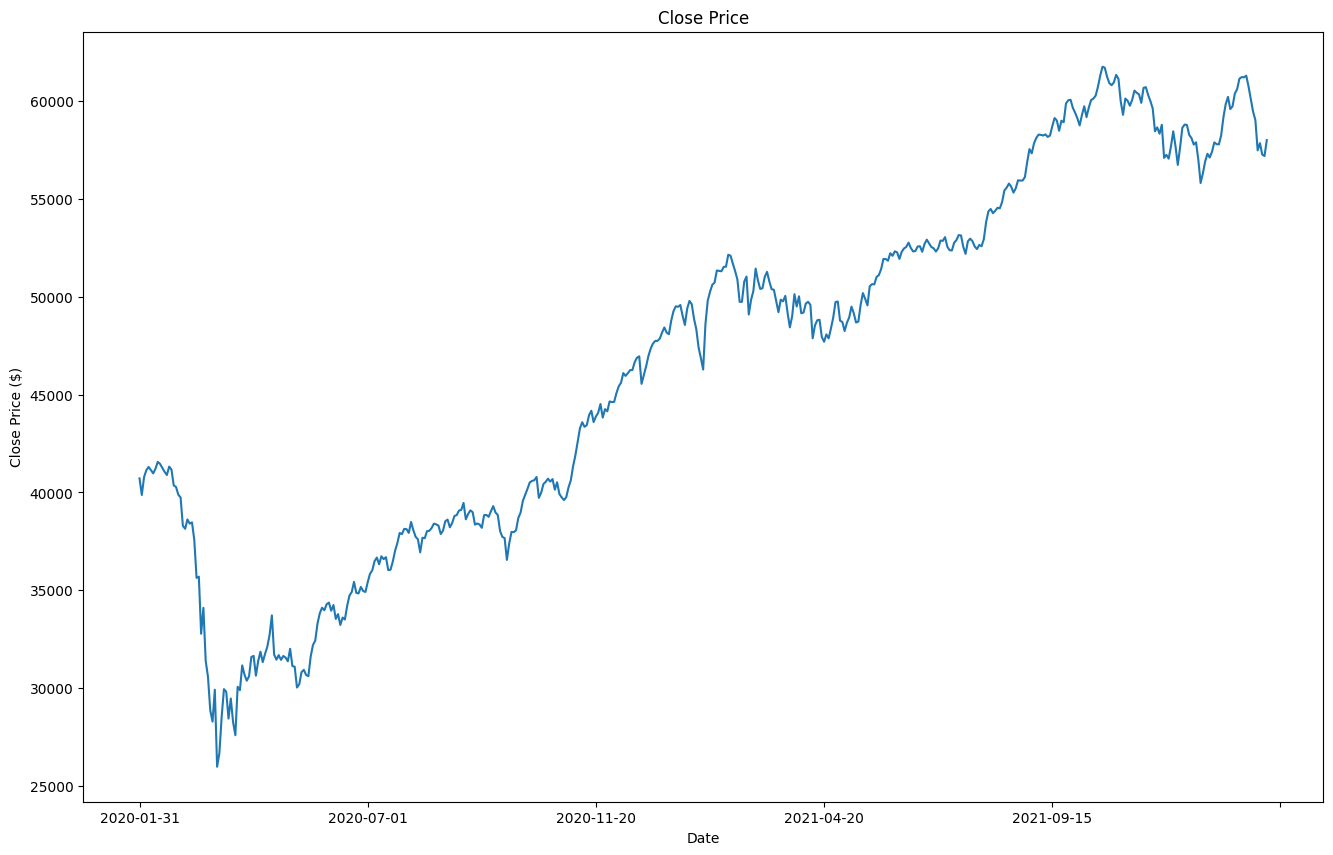

In [21]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting close price
stock_data['Close'].plot()

# setting plot title, x and y labels
plt.title("Close Price")
plt.xlabel('Date')
plt.ylabel('Close Price ($)')

In [22]:
# calculating 7 day rolling mean
stock_data.rolling(7).mean().head(20)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-10,40850.762835,-0.999629,0.146714,0.771143,0.081857,40816.897879,41019.603795,40577.187500,13828.571429
2020-02-11,40921.141741,-0.999629,0.150000,0.766143,0.083571,40822.159598,41061.011161,40649.777344,13285.714286
2020-02-12,41163.083147,-0.999714,0.147571,0.773571,0.078571,41054.992746,41297.719866,40902.317523,13142.857143


<AxesSubplot:xlabel='Date'>

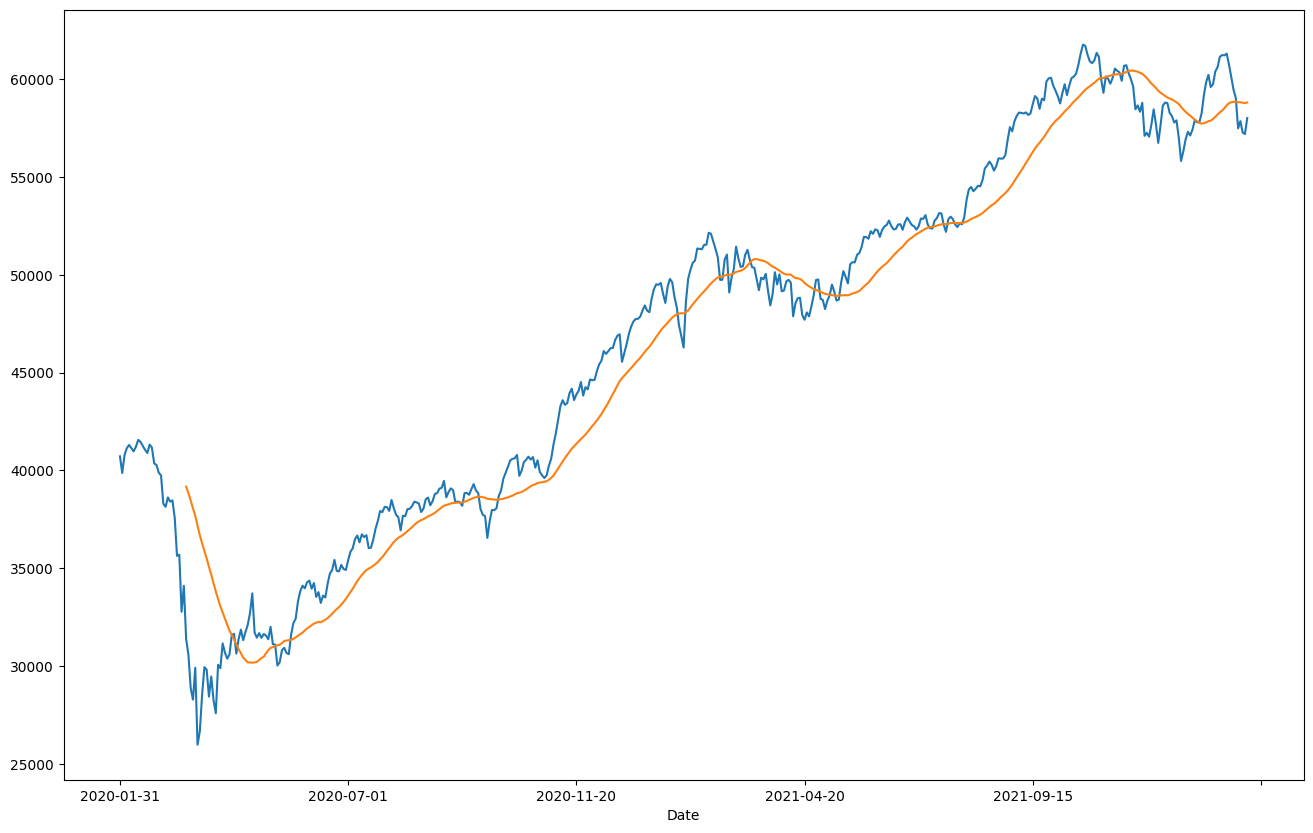

In [23]:
# setting figure size
plt.figure(figsize=(16,10))

# plotting the close price and a 30-day rolling mean of close price
stock_data['Close'].plot()
stock_data.rolling(window=30).mean()['Close'].plot()

In [24]:
# displaying stock_data
stock_data

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-01-31,40723.488281,-0.9999,0.134,0.803,0.062,41146.558594,41154.488281,40671.011719,11500.0
2020-02-03,39872.308594,-0.9980,0.119,0.773,0.108,39701.019531,40014.898438,39563.070313,10600.0
2020-02-04,40789.378906,-0.9999,0.171,0.745,0.084,40178.738281,40818.941406,40117.460938,15300.0
2020-02-05,41142.660156,-0.9999,0.150,0.773,0.076,40921.710938,41177.000000,40703.320313,13900.0
2020-02-06,41306.031250,-0.9999,0.156,0.762,0.082,41209.128906,41405.429688,41113.109375,15000.0
...,...,...,...,...,...,...,...,...,...
2022-01-24,57491.511719,-0.9999,0.164,0.751,0.086,59023.968750,59023.968750,56984.011719,10800.0
2022-01-25,57858.148438,-0.9997,0.114,0.816,0.070,57158.628906,57966.929688,56409.628906,10400.0
2022-01-27,57276.941406,0.9961,0.091,0.802,0.107,57317.378906,57508.609375,56439.359375,10300.0


In [25]:
stock_data.columns

Index(['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High',
       'Low', 'Volume'],
      dtype='object')

In [26]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(stock_data))
new_df.columns = stock_data.columns
new_df.index = stock_data.index
new_df.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2020-01-31,0.411975,0.00005,0.471545,0.503356,0.216867,0.410772,0.393635,0.417724,0.060574
2020-02-03,0.388188,0.00100,0.349593,0.302013,0.771084,0.370231,0.360871,0.386936,0.055792
2020-02-04,0.413816,0.00005,0.772358,0.114094,0.481928,0.383629,0.383988,0.402342,0.080765
2020-02-05,0.423689,0.00005,0.601626,0.302013,0.385542,0.404466,0.394282,0.418622,0.073326
2020-02-06,0.428254,0.00005,0.650407,0.228188,0.457831,0.412526,0.400849,0.430009,0.079171


<h5>Data Modelling and model evaluation</h5>

In [44]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost 
import lightgbm 

In [28]:
X = new_df.drop('Close', axis='columns')
Y = new_df['Close']

In [29]:
# Splitting the data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [30]:
print('Shape of input train data',X_train.shape,'Shape of input test data',X_test.shape)

Shape of input train data (396, 8) Shape of input test data (99, 8)


<h5>1. RandomForestRegressor</h5>

In [32]:
# RandomForestRegressor
RFC = RandomForestRegressor()
RFC.fit(X_train, Y_train)
prediction_RFC = RFC.predict(X_test)

In [37]:
print('Root Mean Square Error: ',mean_squared_error(prediction_RFC, Y_test))
print('Accuracy of model', RFC.score(X_test, Y_test)*100,'%')

Root Mean Square Error:  6.0964667577316256e-05
Accuracy of model 99.90601091489775 %


<h5>2. AdaBoostRegressor</h5>

In [33]:
# AdaBoostRegressor
ADA = AdaBoostRegressor()
ADA.fit(X_train, Y_train)
prediction_ADA = ADA.predict(X_test)

In [39]:
print('Root Mean Square Error: ',mean_squared_error(prediction_ADA, Y_test))
print('Accuracy of model', ADA.score(X_test, Y_test)*100,'%')

Root Mean Square Error:  0.0002309887639340994
Accuracy of model 99.64388516408242 %


<h5>3. Xgboost</h5>

In [40]:
# xgboost
XGB = xgboost.XGBRegressor()
XGB.fit(X_train, Y_train)
prediction_XGB = XGB.predict(X_test)

In [41]:
print('Root Mean Square Error: ',mean_squared_error(prediction_XGB, Y_test))
print('Accuracy of model', XGB.score(X_test, Y_test)*100,'%')

Root Mean Square Error:  9.615355184210737e-05
Accuracy of model 99.85176029450976 %


<h5>3. Lightgbm</h5>

In [42]:
# lightgbm
lgb = lightgbm.LGBMRegressor()
lgb.fit(X_train, Y_train)
prediction_lgb = lgb.predict(X_test)

In [43]:
print('Root Mean Square Error: ',mean_squared_error(prediction_lgb, Y_test))
print('Accuracy of model', lgb.score(X_test, Y_test)*100,'%')

Root Mean Square Error:  0.00013649088677783808
Accuracy of model 99.78957231979041 %


<h5>4. DecisionTreeRegressor</h5>

In [45]:
# DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(X_train, Y_train)
prediction_DTR = DTR.predict(X_test)

In [46]:
print('Root Mean Square Error: ',mean_squared_error(prediction_DTR, Y_test))
print('Accuracy of model', DTR.score(X_test, Y_test)*100,'%')

Root Mean Square Error:  8.206076059651998e-05
Accuracy of model 99.87348711773947 %
